In [1]:
import matplotlib.pyplot as plt
import torch
import h5py
import os

In [2]:
from torchvision.transforms.functional import center_crop 

In [3]:
import numpy as np
import random

In [4]:
csm_path = "/echo/allgemein/projects/Open Source MRI/Data/csm_reconstructed/gpu/brain_multicoil_train/"
rss_path = "/home/global/mri_datasets/fastmri/brain_multicoil_train/"

In [33]:
walsh = "/scratch/lunin01/data/csm_reconstructed/walsh/brain_multicoil_train/"
no_stack = "/scratch/lunin01/data/csm_reconstructed/inati/no_stack/brain_multicoil_train/"
with_stack = "/scratch/lunin01/data/csm_reconstructed/inati/z_stack/brain_multicoil_train/"

In [22]:
files_no_stack = list(sorted(filter(lambda x: x.endswith(".h5"), os.listdir(no_stack))))
files_with_stack = list(sorted(filter(lambda x: x.endswith(".h5"), os.listdir(with_stack))))

In [23]:
print(files_no_stack)
print(files_with_stack)

['file_brain_AXT2_201_2010174.h5', 'file_brain_AXT2_202_2020224.h5', 'file_brain_AXT2_203_2030221.h5', 'file_brain_AXT2_208_2080554.h5', 'file_brain_AXT2_208_2080630.h5', 'file_brain_AXT2_209_2090280.h5', 'file_brain_AXT2_209_2090341.h5', 'file_brain_AXT2_209_6001463.h5', 'file_brain_AXT2_210_6001543.h5', 'file_brain_AXT2_210_6001931.h5']
['file_brain_AXT2_201_2010174.h5', 'file_brain_AXT2_202_2020224.h5', 'file_brain_AXT2_203_2030221.h5', 'file_brain_AXT2_208_2080554.h5', 'file_brain_AXT2_208_2080630.h5', 'file_brain_AXT2_209_2090280.h5', 'file_brain_AXT2_209_2090341.h5', 'file_brain_AXT2_209_6001463.h5', 'file_brain_AXT2_210_6001543.h5', 'file_brain_AXT2_210_6001931.h5']


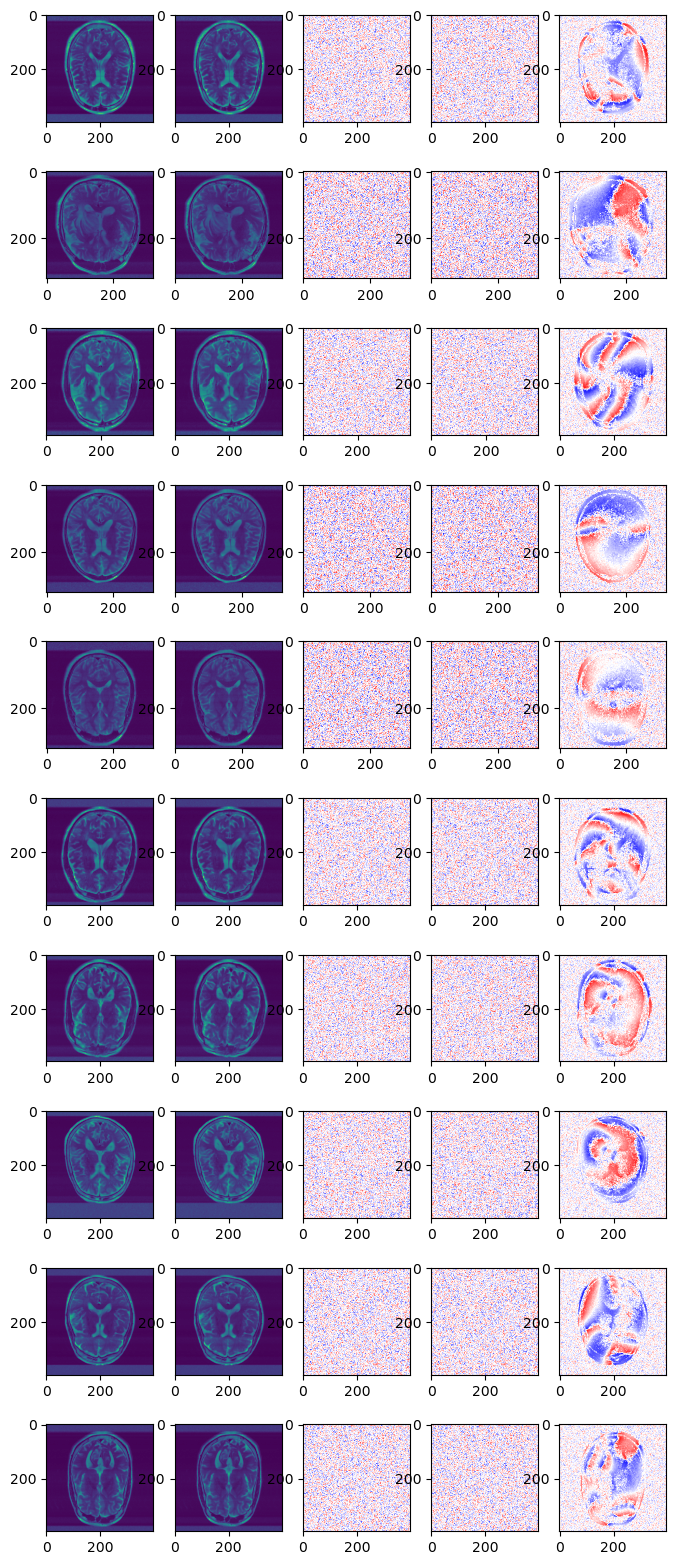

In [35]:
rows = 10
f = plt.figure(figsize=(8, 2*rows))
axs = f.subplots(rows, 5)
for axis, file_no_stack, file_with_stack in zip(axs, files_no_stack, files_with_stack):
    file_no_stack_path = os.path.join(no_stack, file_no_stack)
    file_with_stack_path = os.path.join(with_stack, file_with_stack)
    
    data_no_stack = torch.from_numpy(h5py.File(file_no_stack_path)["reconstruction_smap"][:][0])
    shape = (min(data_no_stack.shape), min(data_no_stack.shape))
    crop = lambda x: center_crop(x, output_size=shape)
    data_crop = crop(data_no_stack)
    data_norm = torch.nn.functional.normalize(data_crop.abs())
    axis[0].imshow(data_norm)
    
    data_stack = crop(torch.from_numpy(h5py.File(file_with_stack_path)["reconstruction_smap"][:])[0])
    data_stack_norm = torch.nn.functional.normalize(data_stack.abs())
    axis[1].imshow(data_stack_norm)

    file_walsh = os.path.join(walsh, file_no_stack)
    data_walsh = crop(torch.from_numpy(h5py.File(file_walsh)["reconstruction_smap"][:])[0])
    data_walsh_norm = torch.nn.functional.normalize(data_walsh.abs())
    
    axis[2].imshow(data_crop.angle() % 2*np.pi - np.pi, cmap="bwr")
    axis[3].imshow(data_stack.angle() % 2*np.pi - np.pi, cmap="bwr")
    axis[4].imshow(data_walsh.angle() % 2*np.pi - np.pi, cmap="bwr")
    #im = axis[2].imshow(data_norm - data_rss_norm)
    #plt.colorbar(im, ax=axis[4])